# Data Analysis Project: Capital Bikeshare Bike Sharing Dataset
- **Name:** James Philip
- **Email:** m004d4ky1475@bangkit.academy
- **ID Dicoding:** James Philip

## Business Questions

1. What is the effect of weather on the number of bike rentals, and which weather conditions are most effective?
2. Is there an increase or decrease in bike rentals on holidays or weekends?
3. Does the time of day influence the number of bike rentals?
4. What is the performance and performance of the company in these two periods?
5. How do the rental figures for bikes vary day by day based on the type of bikes rented?

## Import Semua Packages/Library yang Digunakan

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling


Data wrangling on this dataset will be divided into 3 sessions: gathering data, assessing data, and cleaning data.

### Gathering Data


**Importing dataset files (day.csv and hour.csv).**

**Loading Day Table**

In [66]:
day_df = pd.read_csv("dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Loading Hour Table**

In [67]:
hour_df = pd.read_csv("dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Dataset characteristics**


Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Day Data Frame

In [68]:
day_df.info() #Checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [69]:
day_df.isna().sum() #checking missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [70]:
print("Jumlah duplikasi: ", day_df.duplicated().sum()) #checking if there are any duplications, if so print the sum

Jumlah duplikasi:  0


In [71]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


HOUR Data Frame

In [72]:
hour_df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [73]:
hour_df.isna().sum() #checking missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [74]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum()) #checking if there are any duplications, if so print the sum

Jumlah duplikasi data:  0


In [75]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

**Day Data Frame**

**1. Renaming the columns in the dataset to make them more understandable to the reader.**

In [76]:
day_df.rename(columns={'temp' : 'temperature', 'weekday' : 'days','yr':'year','dteday':'date','mnth':'month', 'weathersit':'weather','cnt':'count','hum':'humidity'},inplace=True)

In [77]:
hour_df.rename(columns={'hr':'hour','temp' : 'temperature', 'weekday' : 'days','yr':'year','dteday':'date','mnth':'month', 'weathersit':'weather','cnt':'count','hum':'humidity'},inplace=True)

**2. Changing data types**

In [78]:
day_df['date'] = pd.to_datetime(day_df.date)

day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['days'] = day_df.days.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather'] = day_df.weather.astype('category')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    int64         
 6   days         731 non-null    category      
 7   workingday   731 non-null    category      
 8   weather      731 non-null    category      
 9   temperature  731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  count        731 non-null    int64         
dtypes: categ

In [79]:
hour_df['date'] = pd.to_datetime(hour_df['date'])

hour_df['season'] = hour_df['season'].astype('category')
hour_df['year'] = hour_df['year'].astype('category')
hour_df['month'] = hour_df['month'].astype('category')
hour_df['days'] = hour_df['days'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weather'] = hour_df['weather'].astype('category')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  category      
 4   month        17379 non-null  category      
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   days         17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weather      17379 non-null  category      
 10  temperature  17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  coun

**3. Dropping Column**

In [80]:
day_df.drop(['instant'], axis = 1, inplace= True) #not important enuogh
day_df.drop(['holiday'], axis = 1, inplace= True) #written alr in workingdaycol


In [81]:
hour_df.drop(['instant'], axis = 1, inplace= True) #not important enuogh
hour_df.drop(['holiday'], axis = 1, inplace= True) #written alr in workingdaycol

**4. Converting numerical values to words to make them easier to read.**

Changing every number that represent something :

**Season :**
1. is springer
2. is summer
3. is fall
4. is winter

In [82]:
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
day_df.head()

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\3246314241.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\3246314241.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.

,date,season,year,month,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [83]:
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.head()

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\1604632530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\1604632530.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_d

,date,season,year,month,hour,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Month :**
1. January
2. February
3. March
4. April
....
12. December




In [84]:
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('January','February','March','April','May','June','July','August','September','October','November', 'December'),inplace = True)
day_df.head()

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\279827337.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('January','February','March','April','May','June','July','August','September','October','November', 'December'),inplace = True)
C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\279827337.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that prese

,date,season,year,month,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,0,January,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,January,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,January,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,January,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,January,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [85]:
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('January','February','March','April','May','June','July','August','September','October','November', 'December'),inplace = True)
hour_df.head()

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\2172364238.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('January','February','March','April','May','June','July','August','September','October','November', 'December'),inplace = True)
C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\2172364238.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that pr

,date,season,year,month,hour,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,0,January,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,January,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,January,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,January,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,January,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Year :**
0. represent 2011
1. represent 2012

In [86]:
day_df['year'] = day_df['year'].apply(lambda x: 2011 if x == 0 else 2012)
day_df.head()

,date,season,year,month,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,January,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,January,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,January,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,January,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [87]:
hour_df['year'] = hour_df['year'].apply(lambda x: 2011 if x == 0 else 2012)
hour_df.head()

,date,season,year,month,hour,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Days :**
0. Monday
1. Tuesday
2. Wednesday
3. Thursday
4. Friday
5. Saturday
6. Sunday

In [88]:
day_df.days.replace((0,1,2,3,4,5,6), ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'),inplace = True)
day_df.head()

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\1756295918.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.days.replace((0,1,2,3,4,5,6), ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'),inplace = True)
C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\1756295918.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use se

,date,season,year,month,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,Sunday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,January,Monday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,January,Tuesday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,January,Wednesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,January,Thursday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [89]:
hour_df.days.replace((0,1,2,3,4,5,6), ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'),inplace = True)
hour_df.head()

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\2595552216.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.days.replace((0,1,2,3,4,5,6), ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'),inplace = True)
C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\2595552216.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use s

,date,season,year,month,hour,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Sunday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,Sunday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,Sunday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,Sunday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,Sunday,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Working Day :**
if day is neither weekend nor holiday is 1, otherwise is 0.

In [90]:
day_df['workingday'] = day_df['workingday'].apply(lambda x: 'Weekend / Holiday' if x == 0 else "Working Day")
day_df.head()

,date,season,year,month,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,Sunday,Weekend / Holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,January,Monday,Weekend / Holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,January,Tuesday,Working Day,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,January,Wednesday,Working Day,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,January,Thursday,Working Day,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [91]:
hour_df['workingday'] = hour_df['workingday'].apply(lambda x: 'Weekend / Holiday' if x == 0 else "Working Day")
hour_df.head()

,date,season,year,month,hour,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Sunday,Weekend / Holiday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,Sunday,Weekend / Holiday,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,Sunday,Weekend / Holiday,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,Sunday,Weekend / Holiday,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,Sunday,Weekend / Holiday,1,0.24,0.2879,0.75,0.0,0,1,1


**Weather :**
1. : Clear, Few clouds, Partly cloudy
2. : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [92]:
day_df['weather'] = day_df['weather'].apply(lambda x: 'Clear / Partly cloudy' if x == 1 else ('Misty + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' if x == 2 else ('Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' if x == 3 else 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')))
day_df.head()

,date,season,year,month,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,Sunday,Weekend / Holiday,"Misty + Cloudy, Mist + Broken clouds, Mist + F...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,January,Monday,Weekend / Holiday,"Misty + Cloudy, Mist + Broken clouds, Mist + F...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,January,Tuesday,Working Day,Clear / Partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,January,Wednesday,Working Day,Clear / Partly cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,January,Thursday,Working Day,Clear / Partly cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [93]:
hour_df['weather'] = hour_df['weather'].apply(lambda x: 'Clear / Partly cloudy' if x == 1 else ('Misty + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' if x == 2 else ('Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' if x == 3 else 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')))
hour_df.head()

,date,season,year,month,hour,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Sunday,Weekend / Holiday,Clear / Partly cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,Sunday,Weekend / Holiday,Clear / Partly cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,Sunday,Weekend / Holiday,Clear / Partly cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,Sunday,Weekend / Holiday,Clear / Partly cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,Sunday,Weekend / Holiday,Clear / Partly cloudy,0.24,0.2879,0.75,0.0,0,1,1


**Temperator to Celc**

Normalized temperature in Celsius. The values are divided to 41 (max)

In [94]:
day_df['temperature'] = day_df['temperature']*41
day_df['temperature'] = round(day_df['temperature'], 1)
day_df.head()

,date,season,year,month,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,Sunday,Weekend / Holiday,"Misty + Cloudy, Mist + Broken clouds, Mist + F...",14.1,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,January,Monday,Weekend / Holiday,"Misty + Cloudy, Mist + Broken clouds, Mist + F...",14.9,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,January,Tuesday,Working Day,Clear / Partly cloudy,8.1,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,January,Wednesday,Working Day,Clear / Partly cloudy,8.2,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,January,Thursday,Working Day,Clear / Partly cloudy,9.3,0.229270,0.436957,0.186900,82,1518,1600


In [95]:
hour_df['temperature'] = hour_df['temperature']*41
hour_df['temperature'] = round(hour_df['temperature'], 1)
hour_df.head()

,date,season,year,month,hour,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.8,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.0,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.0,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.8,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.8,0.2879,0.75,0.0,0,1,1


**ATemp**

Normalized feeling temperature in Celsius. The values are divided to 50 (max)

In [96]:
day_df['atemp'] = day_df['atemp']*50
day_df['atemp'] = round(day_df['atemp'], 1)
day_df.head()

,date,season,year,month,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,Sunday,Weekend / Holiday,"Misty + Cloudy, Mist + Broken clouds, Mist + F...",14.1,18.2,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,January,Monday,Weekend / Holiday,"Misty + Cloudy, Mist + Broken clouds, Mist + F...",14.9,17.7,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,January,Tuesday,Working Day,Clear / Partly cloudy,8.1,9.5,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,January,Wednesday,Working Day,Clear / Partly cloudy,8.2,10.6,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,January,Thursday,Working Day,Clear / Partly cloudy,9.3,11.5,0.436957,0.186900,82,1518,1600


In [97]:
hour_df['atemp'] = hour_df['atemp']*50
hour_df['atemp'] = round(hour_df['atemp'], 1)
hour_df.head()

,date,season,year,month,hour,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.8,14.4,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.0,13.6,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.0,13.6,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.8,14.4,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.8,14.4,0.75,0.0,0,1,1


**Humidity**

Normalized humidity. The values are divided to 100 (max)

In [98]:
day_df['humidity'] = day_df['humidity']*100
day_df['humidity'] = round(day_df['humidity'], 1)
day_df.head()

,date,season,year,month,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,Sunday,Weekend / Holiday,"Misty + Cloudy, Mist + Broken clouds, Mist + F...",14.1,18.2,80.6,0.160446,331,654,985
1,2011-01-02,Spring,2011,January,Monday,Weekend / Holiday,"Misty + Cloudy, Mist + Broken clouds, Mist + F...",14.9,17.7,69.6,0.248539,131,670,801
2,2011-01-03,Spring,2011,January,Tuesday,Working Day,Clear / Partly cloudy,8.1,9.5,43.7,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,January,Wednesday,Working Day,Clear / Partly cloudy,8.2,10.6,59.0,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,January,Thursday,Working Day,Clear / Partly cloudy,9.3,11.5,43.7,0.186900,82,1518,1600


In [99]:
hour_df['humidity'] = hour_df['humidity']*100
hour_df['humidity'] = round(hour_df['humidity'], 1)
hour_df.head()

,date,season,year,month,hour,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.8,14.4,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.0,13.6,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.0,13.6,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.8,14.4,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.8,14.4,75.0,0.0,0,1,1


**Windspeed**

Normalized wind speed. The values are divided to 67 (max)

In [100]:
day_df['windspeed'] = day_df['windspeed']*67
day_df['windspeed'] = round(day_df['windspeed'], 1)
day_df.head()

,date,season,year,month,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,Sunday,Weekend / Holiday,"Misty + Cloudy, Mist + Broken clouds, Mist + F...",14.1,18.2,80.6,10.7,331,654,985
1,2011-01-02,Spring,2011,January,Monday,Weekend / Holiday,"Misty + Cloudy, Mist + Broken clouds, Mist + F...",14.9,17.7,69.6,16.7,131,670,801
2,2011-01-03,Spring,2011,January,Tuesday,Working Day,Clear / Partly cloudy,8.1,9.5,43.7,16.6,120,1229,1349
3,2011-01-04,Spring,2011,January,Wednesday,Working Day,Clear / Partly cloudy,8.2,10.6,59.0,10.7,108,1454,1562
4,2011-01-05,Spring,2011,January,Thursday,Working Day,Clear / Partly cloudy,9.3,11.5,43.7,12.5,82,1518,1600


In [101]:
hour_df['windspeed'] = hour_df['windspeed']*67
hour_df['windspeed'] = round(hour_df['windspeed'], 1)
hour_df.head()

,date,season,year,month,hour,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.8,14.4,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.0,13.6,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.0,13.6,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.8,14.4,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,Sunday,Weekend / Holiday,Clear / Partly cloudy,9.8,14.4,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

**Explore Data day_df**

In [102]:
day_df.describe(include="all")

,date,season,year,month,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
count,731,731,731.0,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2.0,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012.0,January,Monday,Working Day,Clear / Partly cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366.0,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.310670,23.717784,62.788235,12.763748,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.400000,4.000000,0.000000,1.500000,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,13.800000,16.900000,52.000000,9.000000,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.400000,24.300000,62.700000,12.100000,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,26.900000,30.450000,73.000000,15.600000,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,35.300000,42.000000,97.200000,34.000000,3410.000000,6946.000000,8714.000000



Based on the table above, it can be observed that the highest amount of user information is during the fall season.

**Number of Users by Season**

In [103]:
day_df.groupby(by='season').agg({
    'casual': ['max', 'min', 'mean'],
    'registered': ['max', 'min', 'mean'],
    'count' : 'sum',
})

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\2665418051.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual                   registered                      count
          max  min         mean        max  min         mean      sum
season                                                               
Spring   3155    9   334.928177       5315  416  2269.204420   471348
Summer   3410  120  1106.097826       6456  674  3886.233696   918589
Fall     3160  118  1202.611702       6917  889  4441.691489  1061129
Winter   3031    2   729.112360       6946   20  3999.050562   841613


Based on the table presented above, it can be observed that the highest number of renters (casual and registered) occurs during the fall season, while the lowest number occurs during the spring season.

**Number of Yearly Users**

In [104]:
day_df.groupby(by="year").agg({
    "registered": ["sum", 'min', 'max', 'mean'],
    "casual": ["sum", 'min', 'max', 'mean'],
    'count' : 'sum',
})

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\3240920060.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="year").agg({


registered                          casual                         \
            sum  min   max         mean     sum min   max         mean   
year                                                                     
2011     995851  416  4614  2728.358904  247252   9  3065   677.402740   
2012    1676811   20  6946  4581.450820  372765   2  3410  1018.483607   

        count  
          sum  
year           
2011  1243103  
2012  2049576


In the table, it can be observed that in 2012, the number of users is higher compared to 2011, amounting to 2,049,576 users.

**Number of Monthly Users**

In [105]:
day_df.groupby(by=['year','month']).agg({
    "date": "nunique",
    "registered": ["sum", 'min', 'max', 'mean'],
    "casual": ["sum", 'min', 'max', 'mean'],
    'count' : 'sum',
})

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\1566584210.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=['year','month']).agg({


date registered                          casual             \
               nunique        sum   min   max         mean    sum  min   max   
year month                                                                     
2011 January        31      35116   416  1844  1132.774194   3073    9   331   
     February       28      41973   905  2348  1499.035714   6242   47   694   
     March          31      51219   491  2355  1652.225806  12826   46  1424   
     April          30      72524   674  3722  2417.466667  22346  121  1965   
     May            31     104771  2213  4238  3379.709677  31050  255  2355   
     June           30     112900  2993  4488  3763.333333  30612  513  1920   
     July           31     104889  2298  4220  3383.516129  36452  562  3065   
     August         31     107849   889  4614  3479.000000  28842  226  1914   
     September      30     100873  1689  4372  3362.433333  26545  118  2521   
     October        31      98289   570  4267  3170.612903  25222   57  2397   
     November       30      86573   935  3891  2885.766667  15594   69  1275   
     December       31      78875   451  3672  2544.354839   8448   50   706   
2012 January        31      87775  1234  4185  2831.451613   8969   67  1070   
     February       29      94416  1456  4546  3255.724138   8721   65  1435   
     March          31     133257  2339  5893  4298.612903  31618  203  3155   
     April          30     135768   907  5950  4525.600000  38456  120  3252   
     May            31     151630  2501  6433  4891.290323  44235  342  3410   
     June           30     159536  3594  6456  5317.866667  43294  477  2963   
     July           31     161902  3195  6790  5222.645161  41705  747  2562   
     August         31     171306  3341  6541  5526.000000  43197  935  2827   
     September      30     174795  3197  6946  5826.500000  43778  371  3160   
     October        31     164303    20  6911  5300.096774  34538    2  3031   
     November       30     131655  1470  5520  4388.500000  21009  123  2290   
     December       31     110468   432  6055  3563.483871  13245    9  1153   

                              count  
                       mean     sum  
year month                           
2011 January      99.129032   38189  
     February    222.928571   48215  
     March       413.741935   64045  
     April       744.866667   94870  
     May        1001.612903  135821  
     June       1020.400000  143512  
     July       1175.870968  141341  
     August      930.387097  136691  
     September   884.833333  127418  
     October     813.612903  123511  
     November    519.800000  102167  
     December    272.516129   87323  
2012 January     289.322581   96744  
     February    300.724138  103137  
     March      1019.935484  164875  
     April      1281.866667  174224  
     May        1426.935484  195865  
     June       1443.133333  202830  
     July       1345.322581  203607  
     August     1393.451613  214503  
     September  1459.266667  218573  
     October    1114.129032  198841  
     November    700.300000  152664  
     December    427.258065  123713


Based on the table above, it is evident that there are months and years in the dataset. In 2011, the busiest month for bike rentals is June with a total of 143,512 users, while in 2012, it is September with 218,573 users.

**Number of Weekly Users**

In [106]:
day_df.groupby(by='workingday').agg({
    'casual': ['max', 'min', 'mean'],
    'registered': ['max', 'min', 'mean'],
    'count' : 'sum',
})

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\1461732691.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


casual                  registered                    \
                     max min         mean        max  min         mean   
workingday                                                               
Weekend / Holiday   3410  54  1371.134199       5966  451  2959.034632   
Working Day         2469   2   606.570000       6946   20  3978.250000   

                     count  
                       sum  
workingday                  
Weekend / Holiday  1000269  
Working Day        2292410

From the data table above, it can be observed that for weekly users, the number of users for bike rentals on weekdays is higher than on weekends/holidays, specifically 2,292,410 users.

**Number of Users by Weather**

In [107]:
day_df.groupby(by='weather').agg({
    'casual': ['max', 'min', 'mean'],
    'registered': ['max', 'min', 'mean'],
    'count' : 'sum',
})

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\3024680781.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather').agg({


casual                  \
                                                      max min        mean   
weather                                                                     
Clear / Partly cloudy                                3410  15  964.030238   
Misty + Cloudy, Mist + Broken clouds, Mist + Fe...   3155   9  687.352227   
Light Snow, Light Rain + Thunderstorm + Scatter...   1264   2  185.476190   

                                                   registered       \
                                                          max  min   
weather                                                              
Clear / Partly cloudy                                    6946  416   
Misty + Cloudy, Mist + Broken clouds, Mist + Fe...       6844  491   
Light Snow, Light Rain + Thunderstorm + Scatter...       4324   20   

                                                                   count  
                                                           mean      sum  
weather                                                                   
Clear / Partly cloudy                               3912.755940  2257952  
Misty + Cloudy, Mist + Broken clouds, Mist + Fe...  3348.510121   996858  
Light Snow, Light Rain + Thunderstorm + Scatter...  1617.809524    37869


From the data above, it can be observed that the bike rentals, both casual and registered, are most abundant during Clear/Partly cloudy weather conditions, amounting to 2,257,952 users.

**Number of Daily Users**

In [108]:
day_df.groupby(by='days').agg({
    'casual': ['max', 'min', 'mean'],
    'registered': ['max', 'min', 'mean'],
    'count' : ['sum','mean'],
})

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\3518396016.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='days').agg({


casual                  registered                      count  \
             max min         mean        max   min         mean     sum   
days                                                                      
Monday      3283  54  1338.295238       5657   451  2890.533333  444027   
Tuesday     3065   2   674.133333       6435    20  3663.990476  455503   
Wednesday   1348   9   556.182692       6697   573  3954.480769  469109   
Thursday    2562   9   551.144231       6946   432  3997.394231  473048   
Friday      1405  15   590.961538       6781   416  4076.298077  485395   
Saturday    2469  38   752.288462       6917  1129  3938.000000  487790   
Sunday      3410  57  1465.257143       5966   570  3085.285714  477807   

                        
                  mean  
days                    
Monday     4228.828571  
Tuesday    4338.123810  
Wednesday  4510.663462  
Thursday   4548.538462  
Friday     4667.259615  
Saturday   4690.288462  
Sunday     4550.542857


The total number of bike rental users per day is highest on Saturdays, with a total of 487,790 users and a mean of 4,690.28 users.

**Explore Data Hour_DF**

In [109]:
hour_df.describe(include="all")

,date,season,year,month,hour,days,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
count,17379,17379,17379.0,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2.0,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012.0,May,NaN,Sunday,Working Day,Clear / Partly cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734.0,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,20.374636,23.791783,62.722884,12.736233,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,13.900000,16.700000,48.000000,7.000000,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,20.500000,24.200000,63.000000,13.000000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,27.100000,31.100000,78.000000,17.000000,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,41.000000,50.000000,100.000000,57.000000,367.000000,886.000000,977.000000


From the data table above, it can be observed that the least bike rentals occur during the fall season. Additionally, it is known that there are a total of 17,379 users from renters.

**Number of Users by Hour**

In [110]:
hour_df.groupby(by=['hour']).agg({
    'casual': ['sum'],
    'registered': ['sum'],
    'count' : ['sum','mean'],
})

casual registered   count            
        sum        sum     sum        mean
hour                                      
0      7375      31755   39130   53.898072
1      4709      19455   24164   33.375691
2      3412      12940   16352   22.869930
3      1893       6281    8174   11.727403
4       874       3554    4428    6.352941
5      1012      13249   14261   19.889819
6      3017      52115   55132   76.044138
7      8037     146134  154171  212.064649
8     15761     245240  261001  359.011004
9     22458     136980  159438  219.309491
10    33789      92468  126257  173.668501
11    43286     108034  151320  208.143054
12    49718     134696  184414  253.315934
13    52713     132206  184919  253.661180
14    55089     120563  175652  240.949246
15    54606     128543  183149  251.233196
16    53834     173914  227748  311.983562
17    54220     282640  336860  461.452055
18    44496     265276  309772  425.510989
19    35505     191284  226789  311.523352
20    26378     138172  164550  226.030220
21    20570     104875  125445  172.314560
22    16200      79412   95612  131.335165
23    11065      52876   63941   87.831044


From the table above, it can be determined that the highest number of users for bike rentals occurs at 5:00 PM or 17:00.

**Number of Users by Days Active**

In [111]:
hour_df.groupby(by=['workingday']).agg({
    'casual': ['sum'],
    'registered': ['sum'],
    'count' : ['sum','mean'],
})

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\1189075958.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by=['workingday']).agg({


casual registered    count            
                      sum        sum      sum        mean
workingday                                               
Weekend / Holiday  316732     683537  1000269  181.405332
Working Day        303285    1989125  2292410  193.207754

In [112]:
hour_df.groupby(by=['workingday','hour']).agg({
    'casual': ['sum'],
    'registered': ['sum'],
    'count' : ['sum','mean'],
})

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\924172263.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by=['workingday','hour']).agg({


casual registered   count            
                          sum        sum     sum        mean
workingday        hour                                      
Weekend / Holiday 0      3829      17055   20884   90.800000
                  1      2876      13111   15987   69.508696
                  2      2371       9752   12123   53.171053
                  3      1465       4386    5851   25.775330
                  4       514       1362    1876    8.264317
                  5       383       1546    1929    8.689189
                  6       875       3417    4292   18.742358
                  7      1988       8039   10027   43.406926
                  8      4718      19688   24406  105.653680
                  9     10399      29246   39645  171.623377
                  10    18311      40804   59115  255.909091
                  11    24637      48201   72838  315.316017
                  12    29163      55443   84606  366.259740
                  13    31514      54587   86101  372.731602
                  14    32246      51987   84233  364.645022
                  15    31532      51354   82886  358.813853
                  16    29710      51770   81480  352.727273
                  17    25829      48911   74740  323.549784
                  18    19371      45272   64643  281.056522
                  19    15076      38209   53285  231.673913
                  20    10756      29434   40190  174.739130
                  21     8314      24360   32674  142.060870
                  22     6453      20241   26694  116.060870
                  23     4402      15362   19764   85.930435
Working Day       0      3546      14700   18246   36.786290
                  1      1833       6344    8177   16.552632
                  2      1041       3188    4229    8.683778
                  3       428       1895    2323    4.942553
                  4       360       2192    2552    5.429787
                  5       629      11703   12332   24.913131
                  6      2142      48698   50840  102.500000
                  7      6049     138095  144144  290.612903
                  8     11043     225552  236595  477.006048
                  9     12059     107734  119793  241.518145
                  10    15478      51664   67142  135.366935
                  11    18649      59833   78482  158.229839
                  12    20555      79253   99808  200.820926
                  13    21199      77619   98818  198.429719
                  14    22843      68576   91419  183.572289
                  15    23074      77189  100263  201.331325
                  16    24124     122144  146268  293.122244
                  17    28391     233729  262120  525.290581
                  18    25125     220004  245129  492.226908
                  19    20429     153075  173504  348.401606
                  20    15622     108738  124360  249.718876
                  21    12256      80515   92771  186.287149
                  22     9747      59171   68918  138.389558
                  23     6663      37514   44177   88.708835


From the data above, it can be observed that there is a significant difference. On working days, the number of users is almost twice as much as the number of users on weekends/holidays, totaling 2,292,410 users. In the table above, it is noted that during working days, the highest number of users is at 5:00 PM with a total of 262,120 users, while on weekends or holidays, the highest number is 86,101 users at 1:00 PM.

## Visualization & Explanatory Analysis

### Question 1 : What is the effect of weather on the number of bike rentals, and which weather conditions are most effective?

In [113]:
day_df.groupby(by='weather').agg({
    'count': 'sum'
}).reset_index().sort_values(by='count', ascending=True)

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\3557263976.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather').agg({


,weather,count
2,"Light Snow, Light Rain + Thunderstorm + Scatte...",37869
1,"Misty + Cloudy, Mist + Broken clouds, Mist + F...",996858
0,Clear / Partly cloudy,2257952


C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\2375943554.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = day_df.groupby(by='weather').agg({'count': 'sum'}).reset_index().sort_values(by='count', ascending=True)


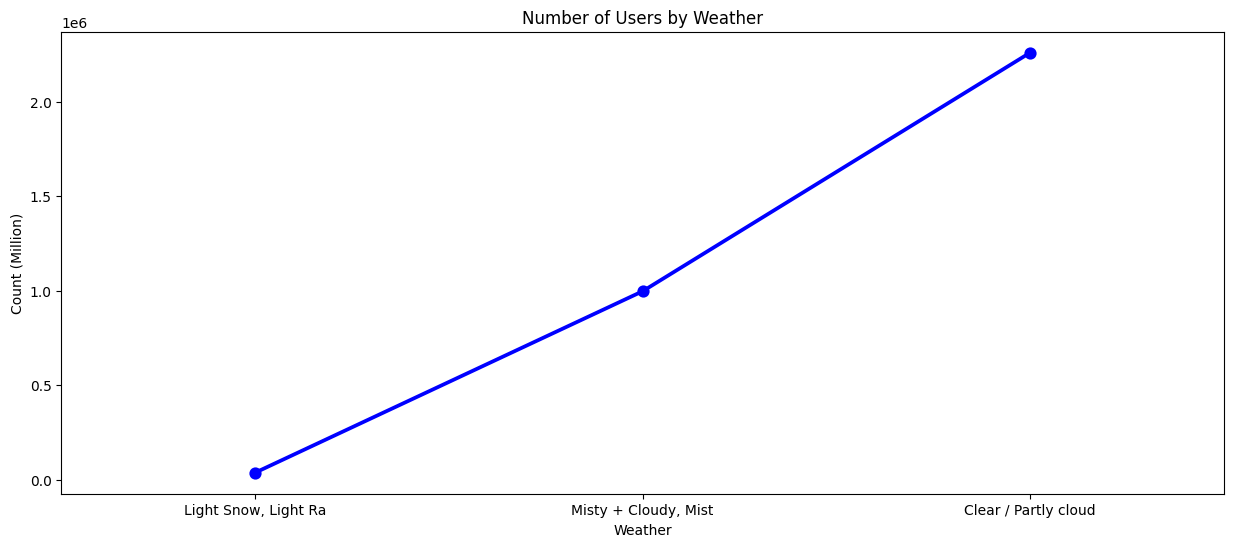

In [114]:
grouped_data = day_df.groupby(by='weather').agg({'count': 'sum'}).reset_index().sort_values(by='count', ascending=True)
grouped_data['weather'] = grouped_data['weather'].str[:20]

plt.figure(figsize=(15, 6))
sns.pointplot(x='weather', y='count', data=grouped_data, color='blue')
plt.xlabel('Weather')
plt.ylabel('Count (Million)')
plt.title('Number of Users by Weather')

plt.xticks(rotation=0)
plt.grid(False)
plt.show()


In the graph and table above, it can be obtained that the highest number of bike rentals occurs when the weather is clear partly cloudy, with a total of 2,257,952 users, while the lowest number of rentals occurs when the weather is light snow and light rain, with a total of 37,869 users.

### Question 2: Is there an increase or decrease in bike rentals on holidays or weekends?

In [115]:
day_df.groupby(by='workingday').agg({
    'count': 'sum'
}).reset_index().sort_values(by='count', ascending=True)

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\1487412899.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


,workingday,count
0,Weekend / Holiday,1000269
1,Working Day,2292410


C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\4181150808.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_counts = day_df.groupby(by='workingday')['count'].sum().reset_index()


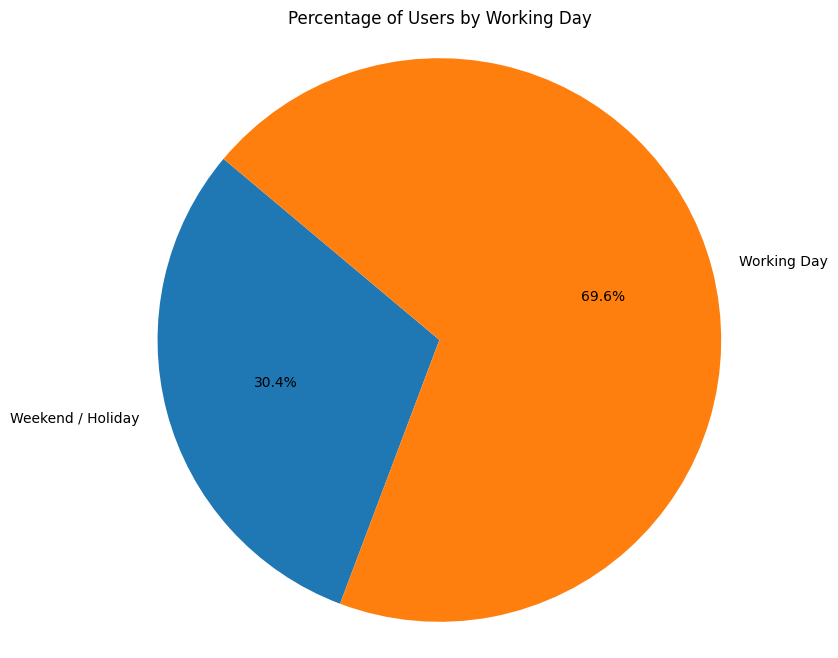

In [116]:
workingday_counts = day_df.groupby(by='workingday')['count'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(workingday_counts['count'], labels=workingday_counts['workingday'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Users by Working Day')
plt.axis('equal')
plt.show()


From the data and pie chart above, it can be concluded that there is an effect of increased bike rentals on working days. On working days, there are 69.6% or 2,292,410 users compared to Weekend/Holiday which only accommodates 30.4% or 1,000,269 users.

### Question 3: Does the time of day influence the number of bike rentals?

In [117]:
hour_df.groupby(by=['hour']).agg({
    'casual': ['sum'],
    'registered': ['sum'],
    'count' : ['sum'],
})

,casual,registered,count
,sum,sum,sum
hour,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171


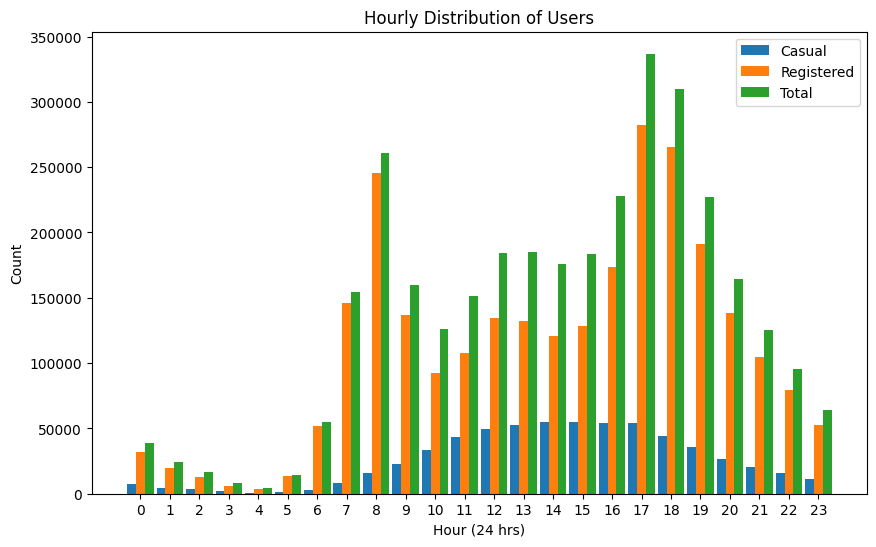

In [118]:
grouped_data = hour_df.groupby(by=['hour']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))

bar_width = 0.3
index = grouped_data['hour']

plt.bar(index - bar_width, grouped_data['casual'], bar_width, label='Casual')
plt.bar(index, grouped_data['registered'], bar_width, label='Registered')
plt.bar(index + bar_width, grouped_data['count'], bar_width, label='Total')

plt.xlabel('Hour (24 hrs)')
plt.ylabel('Count')
plt.title('Hourly Distribution of Users')
plt.xticks(index)
plt.legend()
plt.grid(False)
plt.show()


Based on the table and the plot above, it can be observed that there is a relationship between bike rentals and the time of day. From the plot above, it is evident that the highest number of bike rentals occurs at 17:00 with a total of 336,860 users. Meanwhile, the lowest number of rentals is at 04:00 with a total of 4,428 users.

### Question 4: What is the performance and performance of the company in these two periods?

In [119]:
day_df.groupby(by=["year","month"]).agg({
    'count' : 'sum',
})

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\2901482703.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=["year","month"]).agg({


count
year month            
2011 January     38189
     February    48215
     March       64045
     April       94870
     May        135821
     June       143512
     July       141341
     August     136691
     September  127418
     October    123511
     November   102167
     December    87323
2012 January     96744
     February   103137
     March      164875
     April      174224
     May        195865
     June       202830
     July       203607
     August     214503
     September  218573
     October    198841
     November   152664
     December   123713

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\313011285.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = day_df.groupby(by=["year", "month"]).agg({'count': 'sum'}).reset_index()


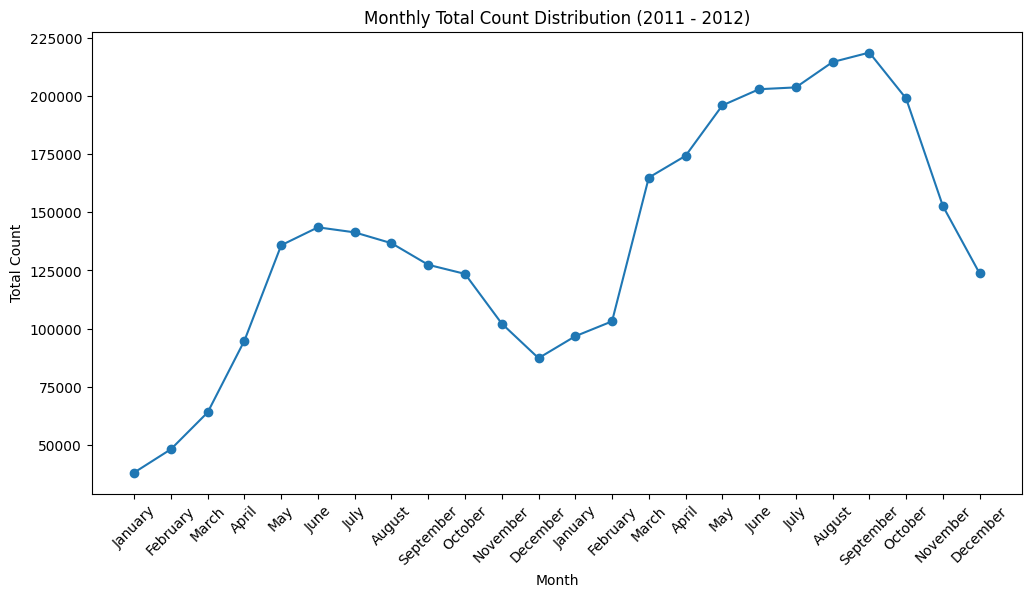

In [120]:
grouped_data = day_df.groupby(by=["year", "month"]).agg({'count': 'sum'}).reset_index()

# Plot garis dengan matplotlib
plt.figure(figsize=(12, 6))

plt.plot(grouped_data.index, grouped_data['count'], marker='o', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Total Count')
plt.title('Monthly Total Count Distribution (2011 - 2012)')
plt.xticks(range(len(grouped_data)), grouped_data['month'], rotation=45)

plt.grid(False)
plt.show()


From the table and plot above, it can be observed that there are fluctuations in bike rentals. The performance and productivity of the company during the period of 2011 - 2012 have a peak value in September with a rental figure of 218,573 users in that month. From this data, it can also be noted that there are some significant changes from February to March, and there is a significant decrease in sales from October to November.

### Question 5 : How do the rental figures for bikes vary day by day based on the type of bikes rented?

In [121]:
day_df.groupby(by=['days']).agg({
    'casual': ['sum'],
    'registered': ['sum'],
    'count' : ['sum'],
}).reset_index()

C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\521285652.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=['days']).agg({


,days,casual,registered,count
,,sum,sum,sum
0,Monday,140521,303506,444027
1,Tuesday,70784,384719,455503
2,Wednesday,57843,411266,469109
3,Thursday,57319,415729,473048
4,Friday,61460,423935,485395
5,Saturday,78238,409552,487790
6,Sunday,153852,323955,477807


C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\742861450.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = day_df.groupby(by=['days']).agg({


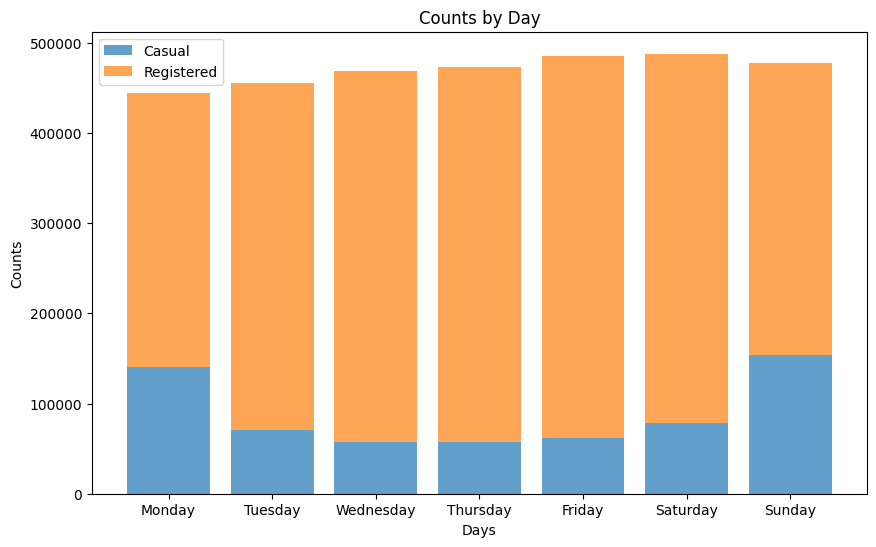

In [122]:
# Ambil data dari hasil groupby
grouped_data = day_df.groupby(by=['days']).agg({
    'casual': ['sum'],
    'registered': ['sum'],
    'count' : ['sum'],
}).reset_index()

# Buat barplot
plt.figure(figsize=(10, 6))

# Plot bar untuk casual
plt.bar(grouped_data['days'], grouped_data['casual']['sum'], label='Casual', alpha=0.7)

# Plot bar untuk registered
plt.bar(grouped_data['days'], grouped_data['registered']['sum'], bottom=grouped_data['casual']['sum'], label='Registered', alpha=0.7)

# Atur label sumbu
plt.xlabel('Days')
plt.ylabel('Counts')

plt.title('Counts by Day')
plt.legend()

plt.show()


C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\335146013.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = day_df.groupby(by=['days']).agg({


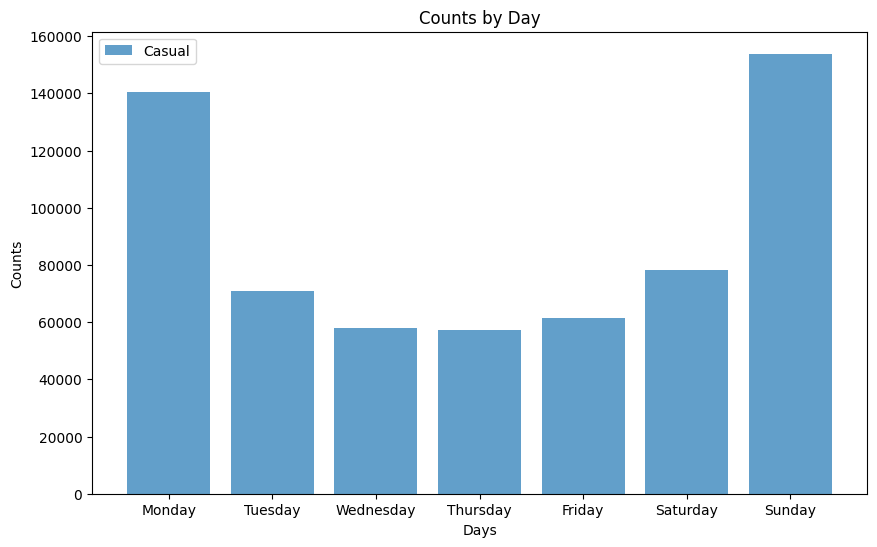

In [123]:
# Ambil data dari hasil groupby
grouped_data = day_df.groupby(by=['days']).agg({
    'casual': ['sum'],
    'registered': ['sum'],
    'count' : ['sum'],
}).reset_index()

# Buat barplot
plt.figure(figsize=(10, 6))

# Plot bar untuk casual
plt.bar(grouped_data['days'], grouped_data['casual']['sum'], label='Casual', alpha=0.7)

# Atur label sumbu
plt.xlabel('Days')
plt.ylabel('Counts')

plt.title('Counts by Day')
plt.legend()

plt.show()


C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\1958057692.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = day_df.groupby(by=['days']).agg({


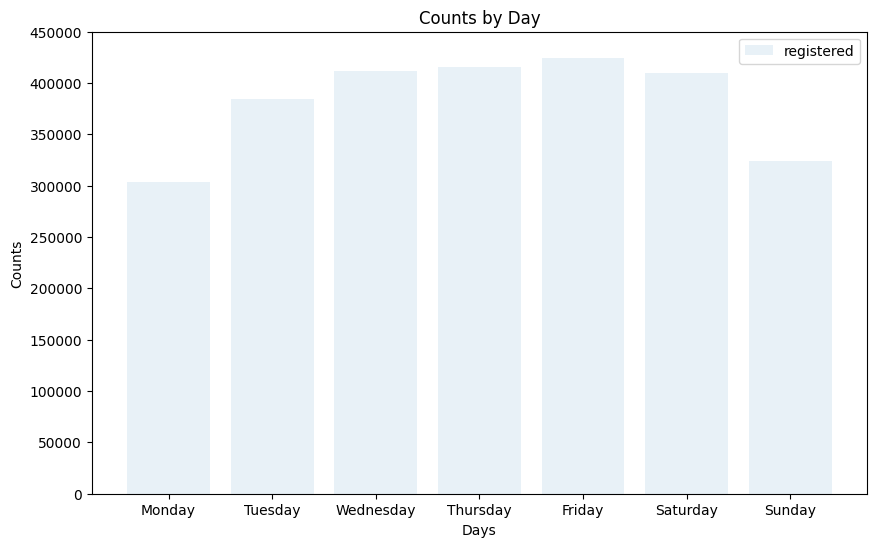

In [124]:
# Ambil data dari hasil groupby
grouped_data = day_df.groupby(by=['days']).agg({
    'casual': ['sum'],
    'registered': ['sum'],
    'count' : ['sum'],
}).reset_index()

# Buat barplot
plt.figure(figsize=(10, 6))

# Plot bar untuk casual
plt.bar(grouped_data['days'], grouped_data['registered']['sum'], label='registered', alpha=0.1)

# Atur label sumbu
plt.xlabel('Days')
plt.ylabel('Counts')
plt.ylim(0,450000)
plt.title('Counts by Day')
plt.legend()

plt.show()



In the above graph, it can be observed that the highest number of bike rentals occurs on Saturdays with a figure of 487,790 rentals, while the lowest number of rentals is on Mondays with 444,027 users. From the graph, it can also be seen that the number of rentals for registered bike types is significantly higher every day compared to casual bike rentals.

**CLUSTERING ANALYSIS**

1. Clustering Analysis (Examining the Number of Users based on weather and humidity)

In [125]:
day_df['kelembapan'] = pd.cut(day_df['humidity'], bins=[0, 45, 65, 100], labels=['Too Humid', 'Normal', 'Too Dry'])
result_df = day_df.groupby(by=['weather', 'kelembapan']).size().reset_index(name='count')

result_df = result_df.sort_values(by='count', ascending=False)

print(result_df)

                                             weather kelembapan  count
1                              Clear / Partly cloudy     Normal    284
5  Misty + Cloudy, Mist + Broken clouds, Mist + F...    Too Dry    194
2                              Clear / Partly cloudy    Too Dry    109
0                              Clear / Partly cloudy  Too Humid     70
4  Misty + Cloudy, Mist + Broken clouds, Mist + F...     Normal     50
8  Light Snow, Light Rain + Thunderstorm + Scatte...    Too Dry     20
3  Misty + Cloudy, Mist + Broken clouds, Mist + F...  Too Humid      3
6  Light Snow, Light Rain + Thunderstorm + Scatte...  Too Humid      0
7  Light Snow, Light Rain + Thunderstorm + Scatte...     Normal      0


C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\4281595597.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_df = day_df.groupby(by=['weather', 'kelembapan']).size().reset_index(name='count')


C:\Users\cuzt2\AppData\Local\Temp\ipykernel_28352\2207006025.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_df = day_df.groupby(by=['weather', 'kelembapan']).size().reset_index(name='count')


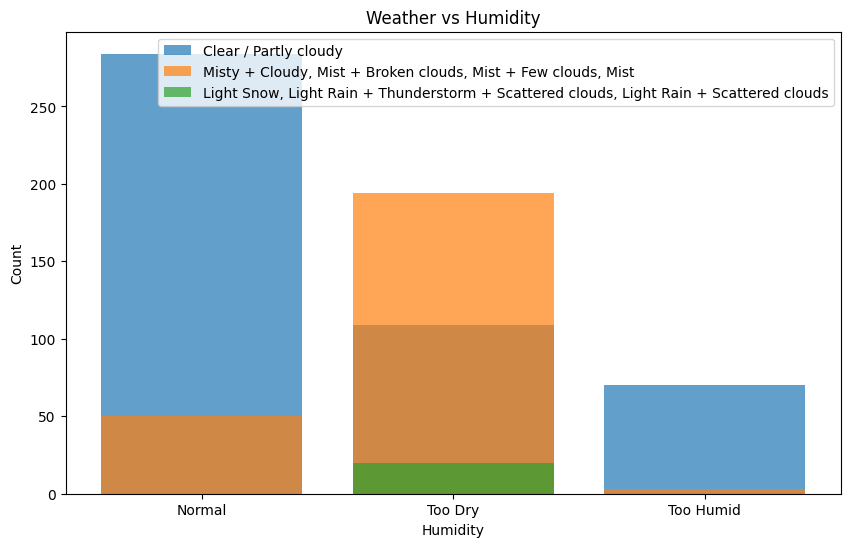

In [126]:
result_df = day_df.groupby(by=['weather', 'kelembapan']).size().reset_index(name='count')

result_df = result_df.sort_values(by='count', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

for weather_type in result_df['weather'].unique():
    subset = result_df[result_df['weather'] == weather_type]
    ax.bar(subset['kelembapan'], subset['count'], label=weather_type, alpha=0.7)

ax.set_xlabel('Humidity')
ax.set_ylabel('Count')
ax.set_title('Weather vs Humidity')
ax.legend()
plt.grid(False)
plt.show()


From the data above, it can be identified that renters tend to rent bikes when the humidity is normal, which often occurs during Clear/Partly Clear weather.

## Conclusion

Conclusion:

1. From the data obtained, it can be inferred that users prefer to rent bikes when the weather is clear or partly cloudy compared to other weather conditions. During clear/partly cloudy weather, the data shows a rental count of over 2 million users, specifically 2,257,952 users, which is significantly higher than the counts during misty+cloudy, mist+broken clouds (996,858 users), and light snow, light rain+thunderstorm (37,869 users). Therefore, it can be concluded that users prefer to rent bikes when the weather is clear.

2. There is a significant difference in bike rentals between weekends/holidays and working days. On working days, there are 69.6% or 2,292,410 users renting bikes, while on weekends/holidays, there are only 30.4% or 1,000,269 users. Hence, it can be inferred that users prefer to rent bikes on working days rather than on weekends/holidays.

3. Based on the visualization data, it can be concluded that the peak time for bike rentals is at 5:00 PM or 17:00, with a total of 336,860 users. Conversely, the least rental activity occurs at 4:00 AM with only 4,428 users.

4. The visualization data reveals significant fluctuations in bike rentals during the period from 2011 to 2012. There is a peak value of 218,573 users in September 2012 and a lowest value of 38,189 users in January 2011. Moreover, there are noticeable increases from February to March and significant decreases from October to November. It can be inferred from the graph that there is a higher increase in users in 2012 compared to 2011.

5. From the visualized data, it's evident that the registered bike type is more preferred by users on a daily basis compared to casual bikes. Additionally, Saturdays witness the highest bike rentals overall with a total of 487,790 users. Specifically, the registered bike type sees the most users on Fridays with 423,935 users, while for casual bikes, Mondays have the highest user count with 140,521 users. Therefore, it can be concluded that users prefer registered bikes over casual bikes.

In [127]:
day_df.to_csv("dashboard/day_clean.csv", index=False)
hour_df.to_csv("dashboard/hour_clean.csv", index=False)